In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv('data.csv')

In [110]:
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [49]:
# artists = data["artists"].unique().tolist()
# artist_dict = {artist: i for i, artist in enumerate(artists)}
# data["artist_id"] = data["artists"].apply(lambda x: artist_dict[x])

# data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artist_id
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,0
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,2
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,4


In [89]:
inputSong = data.loc[data['id'] == "70C4NyhjD5OZUMzvWZ3njJ"] # Input song is Billy Joel's Piano Man

In [90]:
#inputSong = inputSong[['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'name']]

inputSong = inputSong[['valence', 'acousticness', 'danceability', 'artists', 'energy', 'explicit', 'instrumentalness', 'liveness', 'mode', 'speechiness', 'name']]

print(inputSong)

       valence  acousticness  danceability         artists  energy  explicit  \
10211    0.429         0.605         0.331  ['Billy Joel']    0.55         0   

       instrumentalness  liveness  mode  speechiness       name  
10211          0.000004     0.192     1       0.0272  Piano Man  


In [91]:
#ModelPlaylist = data[['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'name']]

ModelPlaylist = data[['valence', 'acousticness', 'danceability', 'artists', 'energy', 'explicit', 'instrumentalness', 'liveness', 'mode', 'speechiness', 'name']]
ModelPlaylist

,valence,acousticness,danceability,artists,energy,explicit,instrumentalness,liveness,mode,speechiness,name
0,0.0594,0.98200,0.279,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.211,0,0.878000,0.6650,1,0.0366,"Piano Concerto No. 3 in D Minor, Op. 30: III. ..."
1,0.9630,0.73200,0.819,['Dennis Day'],0.341,0,0.000000,0.1600,1,0.4150,Clancy Lowered the Boom
2,0.0394,0.96100,0.328,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.166,0,0.913000,0.1010,1,0.0339,Gati Bali
3,0.1650,0.96700,0.275,['Frank Parker'],0.309,0,0.000028,0.3810,1,0.0354,Danny Boy
4,0.2530,0.95700,0.418,['Phil Regan'],0.193,0,0.000002,0.2290,1,0.0380,When Irish Eyes Are Smiling
...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,0.08460,0.786,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.808,0,0.000289,0.0822,1,0.0881,China
170649,0.7340,0.20600,0.717,['Ashnikko'],0.753,0,0.000000,0.1010,1,0.0605,Halloweenie III: Seven Days
170650,0.6370,0.10100,0.634,['MAMAMOO'],0.858,0,0.000009,0.2580,0,0.0809,AYA
170651,0.1950,0.00998,0.671,['Eminem'],0.623,1,0.000008,0.6430,1,0.3080,Darkness


In [92]:
recommended_sim = ModelPlaylist.copy()

In [94]:
nparray_sim = cosine_similarity(inputSong.drop(['name', 'artists'], axis = 1).values, ModelPlaylist.drop(['name', 'artists'], axis = 1).values)

In [95]:
recommended_sim['sim'] = nparray_sim.tolist()[0]

In [109]:
BillySongs = recommended_sim.loc[recommended_sim['artists'] == "['Billy Joel']"].sort_values('sim',ascending = False).head(10)

BillySongs

,valence,acousticness,danceability,artists,energy,explicit,instrumentalness,liveness,mode,speechiness,name,sim
10211,0.429,0.605,0.331,['Billy Joel'],0.550,0,0.000004,0.1920,1,0.0272,Piano Man,1.000000
85416,0.436,0.667,0.338,['Billy Joel'],0.475,0,0.000003,0.2470,1,0.0272,Piano Man,0.996922
115470,0.463,0.610,0.412,['Billy Joel'],0.481,0,0.001170,0.1840,1,0.0305,Stop in Nevada,0.996888
99297,0.420,0.683,0.400,['Billy Joel'],0.491,0,0.000041,0.2420,1,0.0251,If I Only Had the Words (To Tell You),0.996195
10243,0.405,0.618,0.334,['Billy Joel'],0.477,0,0.000004,0.3120,1,0.0276,Piano Man,0.994866
15879,0.431,0.600,0.334,['Billy Joel'],0.472,0,0.000004,0.3170,1,0.0277,Piano Man,0.994548
65756,0.362,0.595,0.410,['Billy Joel'],0.524,0,0.000094,0.0770,1,0.0667,The Ballad of Billy the Kid,0.993445
29131,0.341,0.567,0.408,['Billy Joel'],0.596,0,0.000174,0.0693,1,0.0682,The Ballad of Billy the Kid,0.991470
99340,0.504,0.608,0.407,['Billy Joel'],0.442,0,0.000565,0.0845,1,0.0311,Stop in Nevada,0.991324
99440,0.394,0.751,0.409,['Billy Joel'],0.448,0,0.000043,0.2700,1,0.0259,If I Only Had the Words (To Tell You),0.989899


In [97]:
recommended_sim_top10 = recommended_sim.sort_values('sim',ascending = False).head(1000)

In [98]:
recommended_sim_top10

,valence,acousticness,danceability,artists,energy,explicit,instrumentalness,liveness,mode,speechiness,name,sim
10211,0.429,0.605,0.331,['Billy Joel'],0.550,0,0.000004,0.1920,1,0.0272,Piano Man,1.000000
27712,0.396,0.603,0.297,['The Miracles'],0.547,0,0.000001,0.1500,1,0.0343,Bad Girl - Single Version,0.999115
28180,0.390,0.537,0.326,['The Vogues'],0.543,0,0.000000,0.1840,1,0.0379,My Special Angel,0.998851
130745,0.445,0.628,0.360,['Jefferson Airplane'],0.532,0,0.000022,0.1450,1,0.0569,Won't You Try / Saturday Afternoon - Live at T...,0.998776
27622,0.408,0.671,0.357,['The Walker Brothers'],0.527,0,0.003630,0.2010,1,0.0357,Make It Easy On Yourself,0.998605
...,...,...,...,...,...,...,...,...,...,...,...,...
157026,0.450,0.796,0.398,['Pankaj Mullick'],0.452,0,0.000020,0.3000,1,0.0429,Mahaprasthaner Pathe,0.987607
169381,0.344,0.608,0.503,['I Prevail'],0.513,0,0.000009,0.0845,1,0.0277,My Heart I Surrender,0.987605
27127,0.396,0.795,0.423,['Darlene Love'],0.776,0,0.000000,0.2010,1,0.0578,White Christmas,0.987597
5879,0.544,0.624,0.454,['Flatt & Scruggs'],0.461,0,0.000007,0.3380,1,0.0334,"Brother, I'm Getting Ready to Go",0.987593


In [81]:
pairs = list(zip(recommended_sim['danceability'],recommended_sim['energy']))

zero = [0]
zero_282 = zero*282

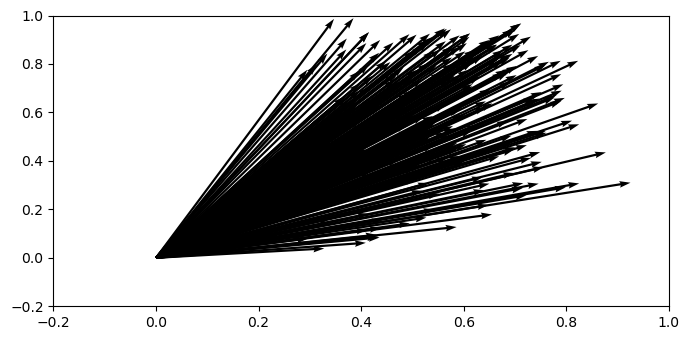

In [82]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plot_data = np.array(pairs)
plt.figure()
ax = plt.gca()

# This graphs the vectors for ALL songs in our model playlist (282)

ax.quiver(zero_282, zero_282, plot_data[:, 0], plot_data[:, 1], angles = 'xy', scale_units='xy', scale=1)

ax.set_xlim([-0.2, 1])
ax.set_ylim([-0.2, 1])
plt.draw()
plt.show()

In [83]:
pairs = list(zip(recommended_sim_top10['danceability'],recommended_sim_top10['energy']))

zero = [0]
zero_10 = zero*10

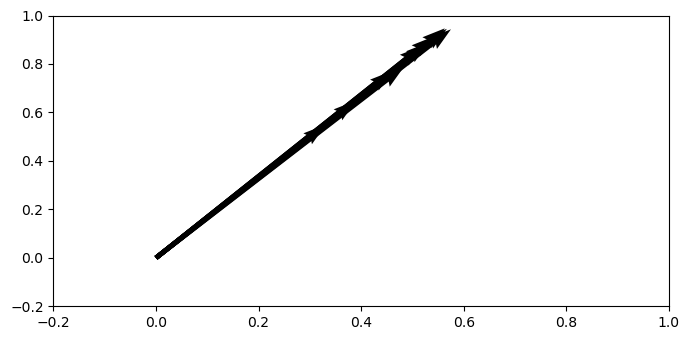

In [84]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plot_data = np.array(pairs)
plt.figure()
ax = plt.gca()

# This graphs the vectors for the top 10 recommended songs
ax.quiver(zero_10, zero_10, plot_data[:, 0], plot_data[:, 1], angles = 'xy', scale_units='xy', scale=1)

ax.set_xlim([-0.2, 1])
ax.set_ylim([-0.2, 1])
plt.draw()
plt.show()